# Backpropagation:
## Historia:
* 1980s: Geoffrey Hinton (acaba de ganar el premio Nobel de fisica), junto otros Ronald Williams , David Rumelhart. Geoffrey de la universidad de Toronto en Canada.
* 1986s... Yan Lecun (el que administra la base de datos del MNIST). Yan Lecun y amigos desarrollaron la LeNet 5 que fue muy existosa para decifrar imagenes (entre ellas la del MNIST).
Combina Backpropagtion con CNN.




Para poder hacer propagacion hacia atras (backpropagation) se necesitan dos cosas:

1. Funcion de costo
2. El gradiente.

La ciencia del "update" esta en la ecuacion

$$\Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla_{\theta} J $$
donde $J=J(\Theta)$ es la funcion de costo.
Vamos a usar la funcion de costo logistica. Inicialmente para dos clases (binario) sabemos que

$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)}) \ + (1 - y_i) \log [ 1 - h(\theta , x^{(i)})] + \frac{\lambda}{2 m } \sum_{j=1}^n \theta_j^2 $$



Queremos hablar de multiclase $K>2$, entonces extendemos esta funcion de costo (existe otra llamada la **softmax**, se ve en el curso de deep learning). Aca usamos otra


$$J(\Theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)}
\log[ h_k(\Theta, x^{(i)})] + (1 - y^{(k)}) \log[ 1 -
h_k(\Theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{l=1}^L \sum_{i=1}^{n_l} \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)})^2 \tag{1} $$




Ya tenemos la funcion de costo. Para hacer "backpropagation" necesitamos el gradiente.

Cual es el proceso:

1. Propagar hacia adelante (clase anterior) hasta la ultima capa.
2. Una vez en la ultima capa se halla el gradiente con respecto a los ultimos parametros $\Theta^{(L)}$ y nos devolvemos hacia la primera capa calculando gradientes a medida que avancemos (hacia atras).


Asumamos 1 capa de entrada $X$, $L$ capas ocultas y una de salida.
1. Propagacion hacia adelante.

\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S( X \Theta^{(1)})  \\
A^{(3)} &=& S(Z^{(3)}) = S( A^{(2)} \Theta^{(2)})  \\
&\vdots& \\
A^{(L-1)} &=& S(Z^{(L-1)}) = S(A^{(L-2)} \Theta^{(L-2)} \\
A^{(L)} &=& S(Z^{(L)}) = S(A^{(L-1)} \Theta^{(L-1)}) \\
h(\Theta , X) &=& A^{(L+1)} = S(Z^{(L+1)} = S(A^{(L)} \Theta^{(L)}).
\end{eqnarray}

Ya estamos en este momento en la ultima capa. Tengamos en cuenta


$$h_{ij}(\Theta, X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)}   \right ) = S_{ij} = A_{ij}^{(L+1)} $$

Vamos a comenzar con la funcion de costo no regularizada

$$J(\theta) = -\frac1m \sum_{i=1}^m \sum_{j=1}^K y_{ij} \log[
    h_{ij}(\theta, x^{(i)})] \ + (1 - y_{ij}) \log [ 1 -
    h_{ij}(\theta , x^{(i)})] $$


Scacamos el gradiente. Recuerden que el gradiente de la sigmoid (logistics) es

$$S'(t) = S(t) (1 - S(t)) $$

\require{cancel}

\cancel{a}




Comenzamos con las primeras derivadas parciales.

\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{(L)}}
&=& -\frac1m \sum_i \sum_j  y_{ij} \frac{S_{ij}(1 - S_{ij})}{S_{ij}} \left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right ) + \frac1m  \sum_i \sum_j (1 - y_{ij}) \frac{S_{ij}(1 - S_{ij})}{1 -S_{ij}} \left ( \sum_k A_{ik}^{(L)} \delta_{pk} \delta_{qj} \right ) \\
&=&  \frac1m  \sum_i -y_{iq} (1 - S_{iq}) A_{ip}^{(L)} +
(1 - y_{iq}) S_{iq} A_{ip}^{(L)} \\
&=& \frac1m  \sum_i -y_{iq} A_{ip}^{(L)} + y_{iq} S_{iq} A_{ip}^{(L)} + S_{iq} A_{ip}^{(L)} - y_{iq} S_{iq} A_{ip}^{(L)} \\
&=& \frac1m \sum_i (S_{iq} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m \sum_i ( A_{iq}^{(L+1)} - y_{iq}) A_{ip}^{(L)} \\
&=& \frac1m (A^{(L)})^T_p ( A^{(L+1)} - Y)_q
\end{eqnarray}

En resumen encontramos que


$$\left ( \frac{\partial J(\Theta, X)}{\partial \Theta^{(L)}} \right ) = \frac1m \left ( (A^{(L)})^T ( A^{(L+1)} - Y)  \right )_{pq} $$

Ese es el gradiente en la ultima capa. Debemos devolvernos a capas anteriores.
Para esto tengamos en cuenta que

$$h_{ij}(\Theta , X) = S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)}  \right )  = A_{ij}^{(L+1)}$$

Vamos a tomar la derviada de la funcion log.

\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& \frac{1}{S_{ij}} S_{ij}(1 - S_{ij}) \sum_k
\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L)}}
\Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)}
\end{eqnarray}
Para calcular la derivada dentro de la suma tenemos en cuenta
llamando $S=A^{(L)}$,

$$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} = S_{ik}(1 - S_{ik}) \sum_r A_{ir}^{(L-1} \delta_{rp} \delta_{kq} =  A_{ik}^{(L)} ( 1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq}$$

Entonces

\begin{eqnarray}
\frac{\partial \log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}
&=& (1 - A_{ij}^{(L+1)}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1}} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{((L+1)}) A_{ik}^{(L)}\sum_k  ( 1 - A_{ik}^{(L)}) A_{ip}^{(L-1)} \delta_{kq} \Theta_{kj}^{(L)} \\
&=& (1 - A_{ij}^{((L+1)}) A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \\
\end{eqnarray}

De la misma forma
\begin{eqnarray}
\frac{\partial \log (1 - h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=& -\frac{1}{1 - S_{ij}} S_{ij}(1 - S_{ij}) \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)} \sum_k \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
&=& -A_{ij}^{(L+1)} \left ( A_{iq}^{(L)}(1 - A_{iq}^{(L)})A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \right )
\end{eqnarray}



Calculemos el gradiente de lo que esta dentro de la doble suma (1).


\begin{eqnarray}
y_{ij} \frac{\partial
\log( h_{ij}(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}}  + (1 - y_{ij})
\frac{\partial \log (1 - h_{ij}
(\Theta, X))}{\partial \Theta_{pq}^{(L-1)}} &=&
y_{ij} (1 - A_{ij}^{((L+1)}) A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
 -(1 - y_{ij})
  A_{ij}^{(L+1)} \left ( A_{iq}^{(L)}(1 - A_{iq}^{(L)})A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \right ) \\
 &=& A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \left [ y_{ij}((1 - A_{ij}^{(L+1)}) -
 (1 - y_{ij}) A_{ij}^{L+1}   \right ]  \\
 &=& (y_{ij} - A_{ij}^{(L+1)}) A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial J(\Theta, X)}{\partial \Theta_{pq}^{L-1}} &=&
 \frac{1}{m} \sum_i \sum_j (A_{ij}^{(L+1)}- y_{ij}) A_{iq}^{(L)} ( 1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \Theta_{qj}^{(L)} \\
 &=& \frac{1}{m} \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)} \sum_j ( A_{ij}^{(L+1)} - y_{ij}) \Theta_{qj}^{(L)} \\
 &=& \frac{1}{m} \sum_i A_{iq}^{(L)} (1 - A_{iq}^{(L)}) A_{ip}^{(L-1)}  \left [ (A^{(L+1)} - Y) (\Theta^{(L)})^T \right ]_{iq}
 \\
 &=& \frac{1}{m} \sum_i A_{ip}^{L-1}  \left [ (A^{(L+1)} - Y) (\Theta^{(L)})^T \right ]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)}) \\
 &=& \frac{1}{m} \sum_i A_{ip}^{L-1}  \left [ (A^{(L+1)} - Y)
 (\Theta^{(L)})^T \right ]_{iq} \left [ A^{(L)} \circ (1 - A^{(L)}) \right ]_{iq} \\
 &=& \frac{1}{m}  [ ( A^{(L-1)})^T]_p \left [ (A^{(L+1)} - Y)
 (\Theta^{(L)})^T \right ]_{iq} \left [ A^{(L)} \circ (1 - A^{(L)}) \right ]_{q}
\end{eqnarray}


donde $\circ$ es el producto Hadamard (punto-a-punto o Schur).o

Ya se tiene la recursion. La formula es igual cuando nos devolvemos a la capa $L-2, L-3, \cdots, 1$. La formula es

$$ [\nabla J(\Theta, X)] (pq)  =  \frac{\partial J(\Theta , X)}{\partial \Theta_{pq}^{(l)}}
= \frac1m ( A^{(l)})_p^T \left [ [ ( A^{(l+2)} - Y) \Theta^{(l+1)})^T \left ( A^{(l+1)} \circ (1 - A^{(l + 1)}    \right )
    \right ]_q $$


    donde $l=L-1, L-2, \cdots , 1$



Una vez hallado el gradiente de $J$, es decir $\nabla J$, el
algoritmo es

$$\Theta^{i+1} = \Theta^{(i)} - \alpha \nabla J(\Theta^{(i)}) $$

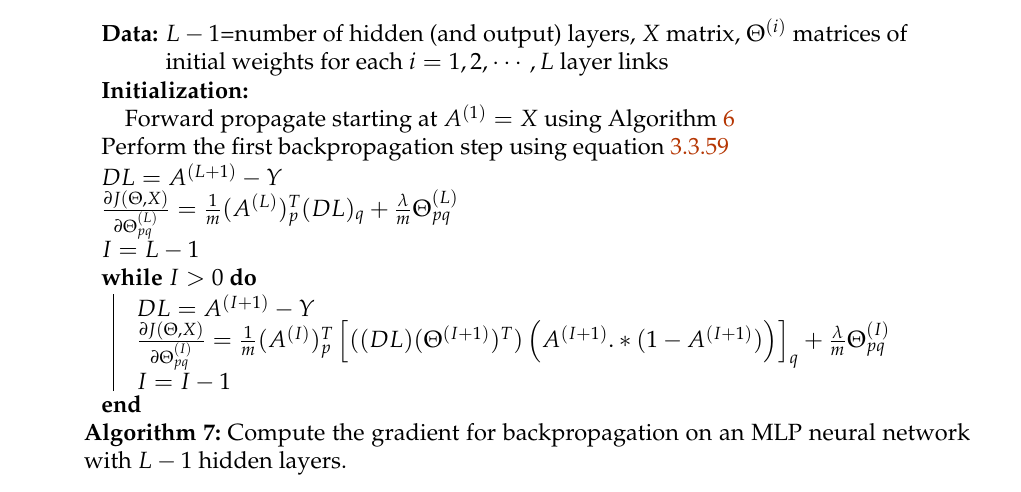

El simbolo "$.*$ " es Hadamdard, tambien $\circ$.

El termino de regularizacion es, de la ecuacion (1)

$$R(\Theta) = \frac{\lambda}{2m} \sum_{i=1}^L \sum_{j=1}^{n_l} \sum_{j=1}^{n_{l+1}} ( \Theta_{ij}^{(l)})^2 $$

Queremos
$$(\nabla R(\Theta))_{pqr} = \frac{\partial R(\Theta)}{\partial \Theta_{pq})} = \frac{2 \lambda}{2 m}
\sum_{i=1}^L \sum_{j=1}^{n_l} \sum_{j=1}^{n_{l+1}} (\Theta_{ij}^{(l)} ) \delta_{ip} \delta_{jq} \delta_{rl} = \frac{\lambda}{m} \Theta_{pq}^{(l)} $$



## Aplicacion al MNIST:
[MNIST: Modified National Institude of Standards and Technology](https://en.wikipedia.org/wiki/MNIST_database)

Los datos son 60mil digitos a mano tomados por empleados de la oficina postal de USA y estudiantes de high school. En forma digital (en colores de gris) de $28 \times 28$ pixeles.

Existen redes neuronales profundas (de mas de dos capas ocultas) pero estas las vemos en el curso de Deep Learning: Ejemplos.

1. CNN: Convolutional Neural Networks
2. GAN: Generative Adversary Networks
3. RNN (Recurrent Neural Networks)
4. LSTM (Long Short Term Memory) networks
5. Autoencoders
6.  Encoder-Decoder
7. Transformers (la de ChatGPT).

Las 3,4,5,6, 7 se usan en LLM: Large Language Models,
translation (traduccion), completacion de frases,
autonomous driving (calcula la proxima direccion).
composicion de musica, poesia.





# Diagnosticos de ML y seleccion de modelos.
Para generar un modelo de ML necesitamos hacer control de calidad QC. Hemos hablado de metricas (matriz confusion, etc) pero debemos volver a como repartimos los datos. Vamos a discutir las siguientes tecnicas.

1. Datos de entrenamiento y prueba (training and testing) 70%-30%
2. Datos de entrenamiento, validacion cruzada (cross-validation
60% - 20 % 20%) y prueba
3. $k$-fold. Se dividen los datos en $k$ grupos y se rotan para que cada grupo compita contra el resto.

El primero es clasico y lo hemos discutido. Me voy a enfocar en el segundo.


Tenemos

* Datos de entrenamiento: por decir algo 60%.  Se hace el entrenamiento inicial para calcular los pesos $\Theta$s

* Datos de validacion: (cross-validation). Se usan para disenhar y probar hiperparametros: Que son hiperparametros:?
    * Numero de capas en una red neuronal
    * Numero de nodos (entrada y salida) por capa
    * Metodo de descenso del gradiente
    * Grado del polinomio
    * El numero de variables en el polinomio.
    * Numero de epocas.

 Mejor dicho: **hiperparametros son todos los parametros menos $\Theta$**

* Los datos de prueba. Ya esto es final, con estos se prepara el algoritmo para lanzarlo (deploy). Si los resultados no son buenos, toca iterar todo el proceso.

Veamos un ejemplo donde se disenhan parametros de un modelo.
Volvemos a regresion lineal (polinomial).

Asuma que tenemos un modelo pero que no estamos seguros de el tipo de polinomio al cual nos queremos ajustar. Entonces
consideramos 6 hipotesis:

\begin{eqnarray}
h_1(\theta, x) &=& \theta_0 + \theta_1 x \\
h_2(\theta, x) &=& \theta_0 + \theta_1 x  + \theta_2 x^2 \\
&\vdots&  \\
h_6(\theta, x) &=& \theta_0 + \theta_1 x  + \theta_2 x^2 + \cdots + \theta_6 x^6 \\
\end{eqnarray}

Dividimos los datos en tres grupos: train, cv, test
Las funciones de costo correspondientes son

$$J_{train}(\theta) = \frac{1}{2 m_{train}} \left [ \sum_{j=1}^{m_{train}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{train}} \theta_i^2
    \right ]  $$

$$J_{cv}(\theta) = \frac{1}{2 m_{cv}} \left [ \sum_{j=1}^{m_{cv}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{cv}} \theta_i^2
    \right ]  $$


$$J_{test}(\theta) = \frac{1}{2 m_{test}} \left [ \sum_{j=1}^{m_{test}} ( h(\theta, x^{(i)}) - y^{(i)})^2 + \lambda \sum_{i=1}^{\theta_{test}} \theta_i^2
    \right ]  $$

Que hacemos con esto? Generar los pesos $\theta$s, para cada
tipo de polinomio desde grado 1 hasta grado 6, obteniendo
vectores $\theta_0, \theta_1, \cdots, \theta_6$ optimos.
Se encuentra el mejor modelo en la parte de entrenamiento (train).

Luego se prueban en la validacion cruzada (cv). La validacion
cruzada se usa para calibrar los hiperparametros. Se puede escoger el grado ideal del polinomio.  

Pasamos con este a la prueba y si la prueba sale bien se libera el codigo, sino toca iterar.

En general partir los datos es facil con el software que tenemos a la mano. Veamos un ejemplo.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# load the mnist
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

In [2]:
len(X_train)

49000

In [6]:
len(X)

70000

In [7]:
len(X_test)/len(X)

0.3

# Proxima clase: Bias versus Variance
(sesgo versus varianza)
comenzamos con SVM: Support Vector Machines.